# **Linear Classification II**

---

### **Introduction**
This notebook goes over the basics of linear classification.

---

### **Author**
**Junichi Koganemaru**  

---

### **References**
1. Elements of Statistical Learning by Trevor Hastie, Robert Tibshirani, and Jerome Friedman.
2. Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani.
3. Data-Driven Science and Engineering by Steven L. Brunton and J. Nathan Kutz.

Diagrams on Support Vector Machines in this notebook from the references cited above.

---

### **Recommended Reading and Resources**

1. [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
2. [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
3. [F1 score](https://en.wikipedia.org/wiki/F1_score)
4. [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
5. [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))
6. [Cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy)
7. [Support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine)
8. [Kernel methods](https://en.wikipedia.org/wiki/Kernel_method) 
9. [Convex optimization](https://en.wikipedia.org/wiki/Convex_optimization)


---

### **Last Updated**
**February 12, 2025**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, auc, roc_curve, roc_auc_score

## Evaluation metrics

In this section we discuss various metrics that can be used to assess the performance of a classifier.

In the last notebook, we have been measuring the performance of a classifier using the *accuracy score*, which is defined as the number of correct predictions divided by the total number of predictions. 

However, this metric can be misleading. For example, suppose we are building a classifier to predict whether an individual has a rare disease, say a rare type of cancer that only affects 0.01% of the population. If we build a classifier that always predicts that the individual does not have the disease, then the accuracy score will be 99.99%. However, this classifier is not useful at all, since it never predicts that an individual has the disease. 

This example (illustrating the [*accuracy paradox*](https://en.wikipedia.org/wiki/Accuracy_paradox)) shows that given imbalanced classes, assessing accuracy of the model alone is not enough. 

### The confusion matrix

One way of measuring the performance of a classifier is by counting the number of mislabeled instances. Suppose there are two classes, which we label as positive and negative. Then the mislabeled instances can be divided into *false positives* and *false negatives*.

In the disease example, a false positive would be an instance where the classifier predicts that an individual has the disease when in fact they do not. A false negative would be an instance where the classifier predicts that an individual does not have the disease when in fact they do. 

A *confusion matrix* is a $2 \times 2$ matrix that is used to describe the performance of a classifier. The rows of the matrix correspond to the true class, while the columns correspond to the predicted class.

<div style="display: flex; justify-content: center;">

| Actual \ Predicted | Positive | Negative |  |
|--------------------|----------|----------|---------|
| Positive           | True Positive (TP) | False Negative (FN) **Type II Error** | Recall = $\frac{TP}{TP + FN}$ |
| Negative           | False Positive (FP) **Type I Error** | True Negative (TN) | Specificity = $\frac{TN}{TN + FP}$ |
|                    | Precision = $\frac{TP}{TP + FP}$ | Negative Predictive Value = $\frac{TN}{TN + FN}$ | |

</div>

In terms of statistical hypothesis testing, the false positives and false negatives correspond to Type I and Type II errors, where the null hypothesis is that the instance belongs to the negative class, and the alternative hypothesis is that the instance belongs to the positive class.

Related to the confusion matrix are the following metrics:
* **Precision** or **positive predictive value**: The proportion of true positive predictions among all positive predictions. It is defined as $\frac{TP}{TP + FP}$.
* **Recall** or **sensitivity**: The proportion of true positive predictions among all actual positive instances. It is defined as $\frac{TP}{TP + FN}$.
* **Negative Predictive Value**: The proportion of true negative predictions among all negative predictions. It is defined as $\frac{TN}{TN + FN}$.
* **Specificity**: The proportion of true negative predictions among all actual negative instances. It is defined as $\frac{TN}{TN + FP}$.
* **F1 Score**: The harmonic mean of precision and recall. It is defined via 
$$
\text{F1} = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

In particular, *precision* is the fraction of true positive predictions among all positive predictions, while *recall* is the fraction of true positive predictions among all actual positive instances.

In the disease example, precision would be the percentage of individuals that were classified as having the disease that actually have the disease, while recall would be the percentage of individuals that have the disease that were correctly classified as having the disease. 

In practice, there is usually a trade-off between precision and recall. In the disease example, one might want to maximize recall, i.e. catch as many cases of the disease as possible, in order to save the lives of those who have the disease. However, this comes at the cost of misdiagnosing some individuals who do not have the disease, i.e. having many false positives, which may lead to costly and dangerous treatments to individuals who are actually healthy.

On the other hand, one might want to maximize precision, i.e. if an individual is classified as having the disease, then a high recall means that they most likely have the disease, which can be useful to avoid unnecessary treatment. However, this comes at the cost of missing some individuals who have the disease, i.e. having many false negatives, which can be fatal to those who are misdiagnosed.

One way to balance the trade-off between precision and recall is to try to maximize the *F1 score*, which is the harmonic mean of precision and recall. The harmonic mean is used instead of the arithmetic mean because it penalizes extreme values more than the arithmetic mean.

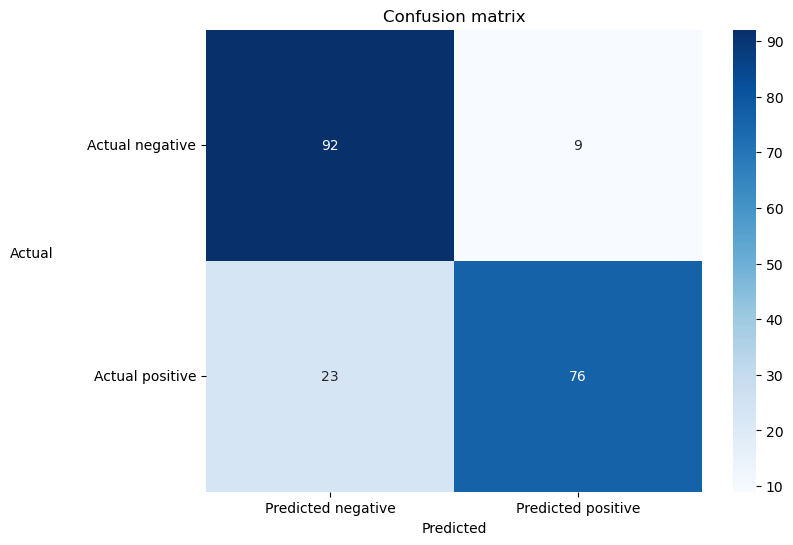

Accuracy: 0.84
Precision: 0.89
Recall: 0.77
F1 score: 0.83


In [ ]:
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted negative', 'Predicted positive'], yticklabels=['Actual negative', 'Actual positive'])
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual', rotation=0, labelpad=40)
plt.title('Confusion matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 score: {f1:.2f}')


## Diagnostic curves 

Besides the various metrics and the confusion matrix described above, another popular way to assess the performance of a classifier is to use various *diagnostic curves* to visualize the performance of the classifier.

### Precision-recall curve 

The precision-recall curve is a plot of precision against recall for different thresholds used to build the classifier. The popular choice is to classify an instance to be positive if the predicted probability is greater than 0.5. However, this threshold can be adjusted, and the precision-recall curve shows how the precision and recall change as the threshold is varied.

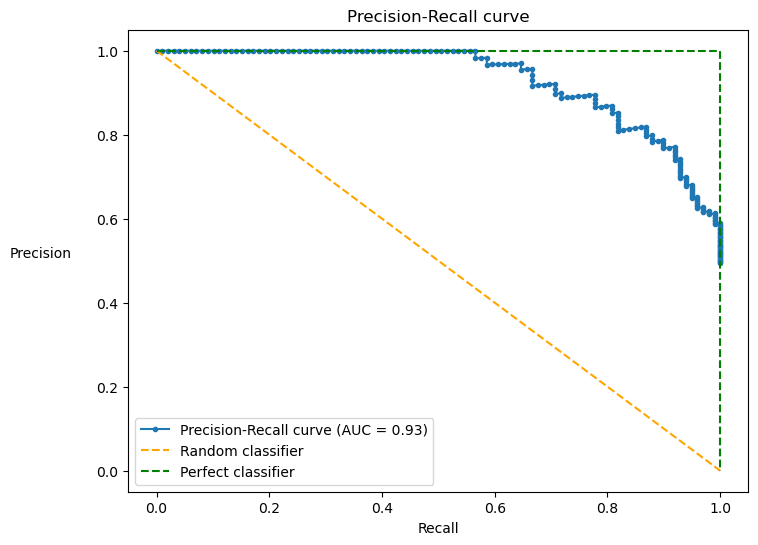

In [ ]:
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_scores = nb.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.plot([0, 1], [1, 0], linestyle='--', color='orange', label='Baseline classifier')
plt.plot([0, 1, 1], [1, 1, 0], linestyle='--', color='g', label='Perfect classifier')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision', rotation=0, labelpad=40)
plt.title('Precision-Recall curve')
plt.show()

A perfect classifier would "hug" the top right corner of the plot and go from (0, 1) to (1, 1) to (1, 0). A popular metric to summarize the precision-recall curve is the *area under the curve* (AUC), which is the area under the precision-recall curve. The AUC ranges from 0 to 1, where a value of 1 indicates a perfect classifier.

### Receiver Operating Characteristic (ROC) curve

An alternative to the precision-recall curve is the ROC curve, which is a plot of the true positive rate (recall) against the false positive rate. 

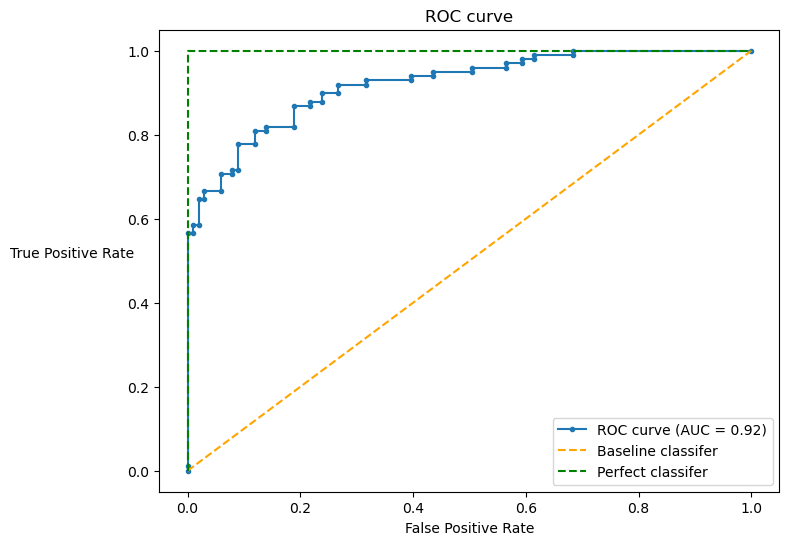

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='orange', label='Baseline classifer')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='g', label='Perfect classifer')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate', rotation=0, labelpad=40)
plt.title(f'ROC curve')
plt.show()


A perfect classifier would "hug" the top left corner of the plot and go from (0, 0) to (0, 1) to (1, 1). The AUC in this case measures how well the classifier separates the classes, as a high AUC score indicates that the classifier has a high true positive rate and a low false positive rate.

### Multiclass confusion matrix

The confusion matrix can be extended to the multiclass case. Suppose there are $K$ classes. Then the confusion matrix is a $K \times K$ matrix, where the rows correspond to the true class and the columns correspond to the predicted class. 

<div style="display: flex; justify-content: center;">

| Actual \ Predicted | Class 1 | $\cdots$ | Class $K$ |  
|--------------------|---------|---------|----------|
| Class 1            | Predict Class 1, Actual Class 1 | $\cdots$ | Predict Class K, Actual Class 1 | 
| $\vdots$           | $\vdots$ | $\ddots$ | $\vdots$ |  
| Class $K$          | Predict Class 1, Actual Class K | $\cdots$ | Predict Class K, Actual Class K |      

</div>

The diagonal entries of the matrix correspond to the number of correct predictions, while the off-diagonal entries correspond to the number of mislabeled instances. In this setting, precision and recall can be defined in terms of a vector, where the $k$-th entry corresponds to the precision and recall for the $k$-th class.


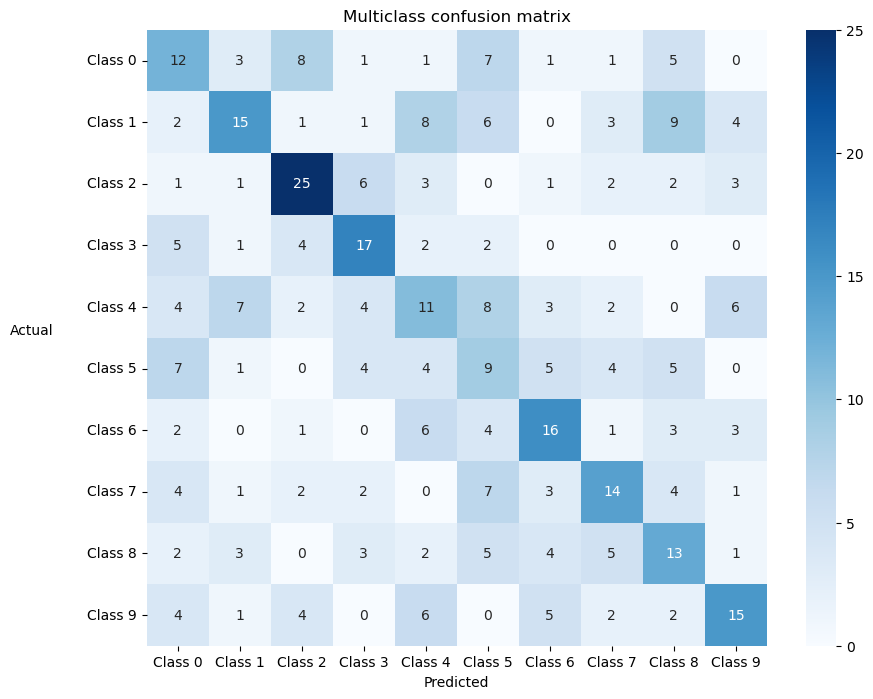

In [43]:
X, y = make_classification(n_samples=2000, n_features=20, n_classes=10, n_informative=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(10)], yticklabels=[f'Class {i}' for i in range(10)])
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual', rotation=0, labelpad=40)
plt.title('Multiclass confusion matrix')
plt.show()


### Multiclass AUC-ROC 

The AUC-ROC score from binary classification can be extended to the multiclass case in many ways. One popular way is to compute the AUC-ROC score for each class against the rest of the classes (One-vs-Rest), where the chosen class is considered the postive class and the remaining classes are considered the negative class in bulk. The final score is the average of the AUC-ROC scores for each class. 

For other alternatives, see the [documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) from scikit-learn. 

### Cross-entropy/softmax loss

Recall that for regression problems, the mean squared error can be used as a metric to measure the performance of the model. 

For classification problems, the *cross-entropy loss* is typically used to measure the performance of a probabilistic classifier. It is defined via the formula
$$
\text{Cross-entropy loss} = - \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(\hat{y}_{ik}),
$$
where $N$ is the number of samples, $K$ is the number of classes, $y_{ik}$ is the indicator function that is 1 if the $i$-th instance belongs to the $k$-th class, and $\hat{y}_{ik}$ is the predicted probability that the $i$-th instance belongs to the $k$-th class.

For example, suppose $N = K = 3 $ and we have the following table of true labels and predicted probabilities:

<div style="display: flex; justify-content: center;">

| Sample | True label | Predicted probabilities |
|----------|------------|-----------------------|
| 1        | (1,0,0)    | (0.9, 0.05, 0.05)     |
| 2        | (0,1,0)    | (0.1, 0.8, 0.1)       |
| 3        | (0,0,1)    | (0.1, 0.2, 0.7)       |

</div>

The cross-entropy in this case would be equal to 
$$
- \left( \log(0.9) + \log(0.8) + \log(0.7) \right) \approx 0.105 + 0.223 + 0.356 = 0.684.
$$

Here the cross-entropy loss is relatively low as the predicted probabilities are close to the true labels. If, for example, we have the following table:

<div style="display: flex; justify-content: center;">

| Sample | True label | Predicted probabilities |
|----------|------------|-----------------------|
| 1        | (1,0,0)    | (0.9, 0.05, 0.05)     |
| 2        | (0,1,0)    | (0.1, 0.8, 0.1)       |
| 3        | (0,0,1)    | (0.9, 0.09, 0.01)       |

</div>

Then the cross-entropy would be equal to
$$
- \left( \log(0.9) + \log(0.8) + \log(0.01) \right) \approx 0.105 + 0.223 + 4.605 = 4.933.
$$

One can think of the cross-entropy loss as "awarding" models that are "confidently correct" and "penalizing" models that "confidently incorrect," i.e. the cross-entropy loss will be high when there is a high mismatch between the predicted probabilities and the true labels.

For classification models built from neural networks, the cross-entropy loss is typically the choice of the loss function used to train the model for multiclass classification problems.

See the [Wikipedia entry](https://en.wikipedia.org/wiki/Entropy_(information_theory)) on entropy for more background information on the cross-entropy loss. Also, this [blog post](https://terrytao.wordpress.com/2016/06/01/how-to-assign-partial-credit-on-an-exam-of-true-false-questions/comment-page-1/) by Prof. Terence Tao is on how to assign partial credit on true/false questions using a variant of the cross-entropy loss. 


## Support vector machines

We conclude our discussion on linear classification by discussing support vector machines (SVMs), which is one of the most popular classifiers used in practice. The main idea behind SVMs is to find the hyperplane that maximizes the *margin* between the classes.

### Separating hyperplanes

<div style="text-align: center;">
    <img src="diagrams/SVM-ISL1.png" alt="SVM-ISL1" style="width: 50%;">
</div>


Suppose we have a binary classification problem with two classes and $n$ samples $(\boldsymbol{x}_1, y_1), \ldots , (\boldsymbol{x}_n, y_n)$ that are *linearly separable*. This means that there exists a hyperplane of the form 
$$
L = \{ \boldsymbol{x} \in \mathbb{R}^p : \boldsymbol{\beta}^T \boldsymbol{x} + \beta_0 = 0 \} \subseteq \mathbb{R}^p,
$$
for which either instances of each class lie on opposite sides of the hyperplane. For example, if $p = 2$, then the hyperplane is a line. One can also think of $L$ as the zero-level set of the function $f: \mathbb{R}^p \to \mathbb{R}$ defined via $f(\boldsymbol{x}) = \boldsymbol{\beta}^T \boldsymbol{x} + \beta_0$.

We note the following:

1. For any two vectors $\boldsymbol{x}_1, \boldsymbol{x}_2 \in \mathbb{R}^p$ for which the endpoints of the vectors lie on $L$, we have $\boldsymbol{\beta}^T (\boldsymbol{x}_1 - \boldsymbol{x}_2) = 0$. This means that the vector $\boldsymbol{\beta}$ is orthogonal to the hyperplane $L$. In particular, the vector $\boldsymbol{\beta}^* = \frac{\boldsymbol{\beta}}{\| \boldsymbol{\beta} \|}$ is normal to the hyperplane $L$.

2. For any vector $\boldsymbol{x}_0 \in \mathbb{R}^p$ for which the endpoint lies on $L$, we have $\boldsymbol{\beta}^T \boldsymbol{x} = - \beta_0$. 

3. If $\boldsymbol{x}_0 \in \mathbb{R}^p$ is a vector for which its endpoint lies on $L$ and $\boldsymbol{x} \in \mathbb{R}^p$ is any other vector, then the projection of $\boldsymbol{x} - \boldsymbol{x}_0$ onto the line spanned by $\boldsymbol{\beta}^*$ is given by $\left( (\boldsymbol{\beta}^*)^T (\boldsymbol{x} - \boldsymbol{x}_0) \right) \boldsymbol{\beta}^* $. We can then use this to define the *signed distance* from $\boldsymbol{x}$ to the hyperplane $L$, as the signed quantity $\boldsymbol{(\beta}^*)^T (\boldsymbol{x} - \boldsymbol{x}_0) = \frac{1}{\| \boldsymbol{\beta} \|} (\boldsymbol{\beta}^T \boldsymbol{x} + \beta_0) = \frac{1}{\| \boldsymbol{\beta} \|} f(\boldsymbol{x})$, meaning that the signed distance from $\boldsymbol{x}$ to the hyperplane $L$ is proportional to the value of the function $f$ at $\boldsymbol{x}$.

Given a separating hyperplane $L$ determined by $f$, one can build a classifer $G : \mathbb{R}^p \to \{ -1, 1 \}$ that assigns a class label to a new instance $\boldsymbol{x}$ based on the sign of $f(\boldsymbol{x})$. If $f(\boldsymbol{x}) > 0$, then the classifier assigns the class label 1, while if $f(\boldsymbol{x}) < 0$, then the classifier assigns the class label -1. Therefore the prediction rule is given by $\hat{y} = G(\boldsymbol{x}) := \text{sign}(f(\boldsymbol{x}))$.

### Rosenblatt's perceptron learning algorithm

Given a set of sample points that are linearly separable, one can find a separating hyperplane by using the *perceptron learning algorithm* proposed by Frank Rosenblatt in 1957. The perceptron learning algorithm finds a separating hyperplane by minimizing the number of misclassified instances. If the response $y_i = 1$ is misclassified, then $\boldsymbol{\beta}^T \boldsymbol{x} + \beta_0 < 0$, and if the response $y_i = -1$ is misclassified, then $\boldsymbol{\beta}^T \boldsymbol{x} + \beta_0 > 0$. The algorithm attempts to minimize the function $D: \mathbb{R}^p \times \mathbb{R} \to \mathbb{R}$ defined via
$$
D(\boldsymbol{\beta}, \beta_0) = - \sum_{i \in I} y_i \left( \boldsymbol{\beta}^T \boldsymbol{x}_i + \beta_0 \right),
$$
where the sum is taken over all misclassified instances. The main downsides of this algorithm is that 

1. If the samples are linearly separable, there are many solutions to this optimization problem.
2. If the samples are not linearly separable, then the optimization problem admits no solutions.

### The maximal margin classifier

To address the first issue of non-uniqueness, one can impose an additional condition that the hyperplane maximizes the *margin* between the classes. 


<div style="text-align: center;">
    <img src="diagrams/SVM_Brunton-Kutz-1.png" alt="SVM-Brunton-Kutz-1" style="width: 50%;">
</div>


We do so by considering the optimization problem
$$
\max_{\boldsymbol{\beta} \in \mathbb{R}^p, \beta_0 \in \mathbb{R}, \| \boldsymbol{\beta}\| = 1 } M \quad \text{subject to} \quad y_i \left( \boldsymbol{\beta}^T \boldsymbol{x}_i + \beta_0 \right) \geq M, \quad i = 1, \ldots, n,
$$
where $M$ is the *margin* between the classes. The normalization condition on $\boldsymbol{\beta}$ can be replaced by rewriting the constraint as 
$$
\frac{1}{\| \boldsymbol{\beta}\|} y_i \left( \boldsymbol{\beta}^T \boldsymbol{x}_i + \beta_0 \right) \geq M \Longleftrightarrow y_i \left( \boldsymbol{\beta}^T \boldsymbol{x}_i + \beta_0 \right) \geq M \| \boldsymbol{\beta} \| 
$$
We note that if $\boldsymbol{\beta}, \beta_0$ satisfy the constraint, then so do $c \boldsymbol{\beta}, c \beta_0$ for any $c > 0$. Therefore, we can set $M = \frac{1}{\| \boldsymbol{\beta} \| }$ without loss of generality. Therefore the optimization problem can be reformulated as the equivalent minimization problem
$$
\min_{\boldsymbol{\beta} \in \mathbb{R}^p, \beta_0 \in \mathbb{R} } \frac{1}{2} \| \boldsymbol{\beta} \|^2 \quad \text{subject to} \quad y_i \left( \boldsymbol{\beta}^T \boldsymbol{x}_i + \beta_0 \right) \geq 1, \quad i = 1, \ldots, n.
$$
The interpretation of this optimization problem is that we are maximizing the *margin* between the classes, where the margin is equal to $\frac{1}{\| \boldsymbol{\beta} \|}$. The constraints ensures that there is an emptly slab-like region between the two classes of thickness $\frac{2}{\| \boldsymbol{\beta} \|}$, and the goal is to maximize the thickness of this slab subject to the constraint.


<div style="text-align: center;">
    <img src="diagrams/SVM-ISL2.png" alt="SVM-ISL2" style="width: 50%;">
</div>




Vectors whose endpoints lie on the boundary of the slab are called *support vectors*. They "support" the slab in the sense that if these endpoints are moved slightly, then the slab-like region would move as well. We note only small movements of the support vectors will change the margin, while movements of other vectors will not change the margin provided that they do not cross the boundary of the slab. This means that the maximal margin classifier only depends directly on the support vectors, which is typically a small subset of the data.


The reformulated minimization problem is an example of a *convex optimization problem* with *linear constraints*. With some theory from convex optimization, we can show that this admits a unique solution under certain conditions. We will discuss this in more detail when we go over some basic ideas from convex optimization in a future notebook. 

The downside of the maximal margin classifier is that it can be incredibly sensitive to single observations.

<div style="text-align: center;">
    <img src="diagrams/SVM-ISL3.png" alt="SVM-ISL3" style="width: 50%;">
</div>


Also, if there is some light mixture between the classes, then the optimization problem admits no solutions. One way to address this is to relax the constraint a bit to allow for some misclassification, which leads to the idea of *soft margin classifiers*.

### The soft margin classifier

The soft margin classifier is also sometimes called the support vector classifier. The idea is to introduce *slack variables* $\xi_i \geq 0$ for each instance, which allows for some misclassification. 

<div style="text-align: center;">
    <img src="diagrams/SVM-ESL.png" alt="SVM-ESL" style="width: 50%;">
</div>

The optimization problem is then given by
$$
\min_{\boldsymbol{\beta} \in \mathbb{R}^p, \beta_0 \in \mathbb{R}, \xi \in \mathbb{R}^n } \frac{1}{2} \| \boldsymbol{\beta} \|^2 + C \sum_{i=1}^n \xi_i \quad \text{subject to} \quad y_i \left( \boldsymbol{\beta}^T \boldsymbol{x}_i + \beta_0 \right) \geq 1 - \xi_i, \quad i = 1, \ldots, n,
$$
where $C > 0$ is a tuning parameter that controls the trade-off between the margin and the number of misclassified instances. The term $C \sum_{i=1}^n \xi_i$ is a penalty term that penalizes the slack variables, and the goal is to minimize the sum of the margin and the penalty term. We note that the modified loss function is also in the form of "loss" + "penalty" as in the ridge and lasso regression problems, so this can be seen as a regularized version of the maximal margin classifier.

<div style="text-align: center;">
    <img src="diagrams/SVM-ISL4.png" alt="SVM-ISL4" style="width: 50%;">
</div>


### Supoort vector machines and the kernel trick

The downside of all the classifiers we have discussed so far is that they are linear classifiers, which means that the decision boundaries are always linear. If the classes are not linearly separable, then these classifiers will not perform well.


<div style="text-align: center;">
    <img src="diagrams/SVM-ISL5.png" alt="SVM-ISL5" style="width: 50%;">
</div>



A simple idea that can allow one to build a non-linear classifier is to map the input features into a higher-dimensional space, compute the margin classifier in the transformed space, and then map the decision boundary back to the original space. This allows one to learn non-linear decision boundaries in the original space.

This is very similar to the idea of transformations in the context of linear regression: by transforming the input features, one can learn non-linear relationships between the input features and the response. 

For example, rather than fitting a linear support vector classifier using $p$ features $X_1, ..., X_p$, one can instead fit a support vector classifier using the $2p$ features $X_1, X_1^2, ..., X_p, X_p^2$. This allows one to learn a quadratic decision boundary in the original space.

In general, one can consider a function $h: \mathbb{R}^p \to \mathbb{R}^q$ where $h(\boldsymbol{x}) = (h_1(\boldsymbol{x}), ..., h_q(\boldsymbol{x}))$. One then identifies the decision boundary determined by finding $f: \mathbb{R}^p \to \mathbb{R}$, where $f(\boldsymbol{x}) = \boldsymbol{\beta}^T h(\boldsymbol{x})  + \beta_0$, which can be fit by fitting a support vector classifier in the transformed space.

Using the aforementioned techniques from convex optimization, one can show that the function $f$ in determining the linear support classifier can be written as 
$$
f(\boldsymbol{x}) = \sum_{i=1}^n \alpha_i y_i  \langle \boldsymbol{x}, \boldsymbol{x}_i \rangle + \beta_0,
$$
where $\alpha_i$ are parameters to be fit. In principle, the sum is taken over all samples in the data. However, as we noted earlier, the maximal margin classifier only depends on the support vectors, which are the samples that lie on the boundary of the slab-like region. In turns out that this property can be seen in the expression for $f$ as well, as $\alpha_i$ is non-zero if and only if the sample $\boldsymbol{x}_i$ is a support vector. Therefore a more robust way to write the function $f$ is
$$
f(\boldsymbol{x}) = \sum_{i \in I} \alpha_i y_i \langle \boldsymbol{x}, \boldsymbol{x}_i \rangle + \beta_0,
$$
for some index set $I$ corresponding to the support vectors. The idea behind the *kernel trick* is to 

1. Replace the Euclidean inner-product by an inner product generated by a *kernel function* $K$. 
2. Instead of specifying the transformation $h$ explicitly, use the kernel function $K$ to encode the transformation.

A simple example of this is when $A$ is a positive definite matrix, then the function $K(\boldsymbol{x}, \boldsymbol{y}) = \boldsymbol{x}^T A \boldsymbol{y}$ generates an inner product in the sense that the bilinear map $\langle \cdot, \cdot \rangle_A$ defined via $\langle \boldsymbol{x}, \boldsymbol{y} \rangle_A = \boldsymbol{x}^T A \boldsymbol{y}$ satisfies all the properties of an inner product. This can be thought of as a *weighted* Eucldiean inner product, where the weights are determined by the matrix $A$.

The most popular choices for $K: \mathbb{R}^p \times \mathbb{R}^p \to \mathbb{R}$ in practice are 
* Polynomial kernel: $K(\boldsymbol{x}, \boldsymbol{y}) = (1 + \langle \boldsymbol{x}, \boldsymbol{y} \rangle)^d$ for some $d > 0$.
* Radial basis function (RBF) kernel: $K(\boldsymbol{x}, \boldsymbol{y}) = \exp(- \gamma \| \boldsymbol{x} - \boldsymbol{y} \|^2)$ for some $\gamma > 0$.
* Sigmoid kernel: $K(\boldsymbol{x}, \boldsymbol{y}) = \tanh(\kappa \langle \boldsymbol{x}, \boldsymbol{y} \rangle + \theta)$ for some $\kappa, \theta > 0$.




<div style="text-align: center;">
    <img src="diagrams/SVM-ISL6.png" alt="SVM-ISL6" style="width: 50%;">
</div>

Below is an instructive diagram from *Data-Driven Science and Engineering* by Steven L. Brunton and J. Nathan Kutz, which shows that it is usually easier to find a separating hyperplane by embedding the data into a higher-dimensional space.


<div style="text-align: center;">
    <img src="diagrams/SVM-Brunton-Kutz-2.png" alt="SVM-Brunton-Kutz-2" style="width: 50%;">
</div>

In ``scikit-learn``, the function ``SVC`` can be used to fit a support vector classifier, and the kernel can be specified using the ``kernel`` parameter. See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for more details.